# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Collado

Student name: Martin
    
ID: 2039907

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas 

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2039907
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 62 61 69 50 59 56 62 65 54]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


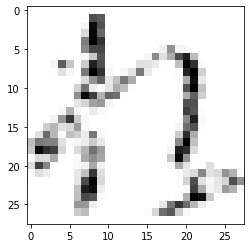

LABEL: 8
INPUT:


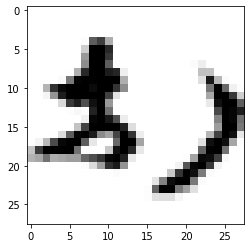

LABEL: 0
INPUT:


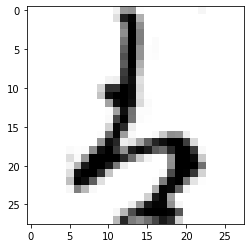

LABEL: 5
INPUT:


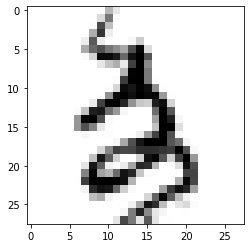

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
import pandas as pd
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1, 10],
              'kernel': ['linear'] 
             }

#train linear SVM
gridsearchcv = GridSearchCV(SVC(),parameters,cv=4)
gridsearchcv.fit(X_train, y_train)


best_parameter = gridsearchcv.best_params_
print("Best parameters set found:",best_parameter)

best_score = gridsearchcv.best_score_
print("Score with best parameters:",best_score)

print("Results for Linear Kernel:")
results = gridsearchcv.cv_results_
dfresults = pd.DataFrame(results)
dfresults
#dfresults[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','mean_test_score','rank_test_score']]




C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found: {'C': 0.1, 'kernel': 'linear'}
Score with best parameters: 0.75
Results for Linear Kernel:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.288494,0.007344,0.076040,0.007136,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.683871,0.776316,0.802721,0.712329,0.743333,0.047823,4
1,0.222914,0.001118,0.057586,0.002391,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.709677,0.782895,0.795918,0.712329,0.750000,0.039447,1
2,0.218167,0.004425,0.055850,0.001222,1,linear,"{'C': 1, 'kernel': 'linear'}",0.709677,0.776316,0.795918,0.712329,0.748333,0.038139,2
3,0.217898,0.003627,0.055630,0.001463,10,linear,"{'C': 10, 'kernel': 'linear'}",0.709677,0.776316,0.795918,0.712329,0.748333,0.038139,2


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1],'kernel':['poly']}

#run SVM with poly of degree 2 kernel
gridsearchcv = GridSearchCV(SVC(degree=2),parameters,cv=4)
gridsearchcv.fit(X_train, y_train)

# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

best_parameter = gridsearchcv.best_params_
print("Best parameters set found:",best_parameter)

best_score = gridsearchcv.best_score_
print("Score with best parameters:",best_score)


print("\nAll scores on the grid:")
results = gridsearchcv.cv_results_
dfresults = pd.DataFrame(results)
dfresults
#dfresults[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','mean_test_score','rank_test_score']]

C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}
Score with best parameters: 0.7533333333333333

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.342557,0.004481,0.064345,0.001107,0.01,0.01,poly,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,9
1,0.260074,0.009696,0.057576,0.001272,0.01,0.1,poly,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}",0.741935,0.776316,0.795918,0.698630,0.753333,0.036604,1
2,0.277042,0.006264,0.055080,0.001604,0.01,1,poly,"{'C': 0.01, 'gamma': 1, 'kernel': 'poly'}",0.741935,0.743421,0.755102,0.705479,0.736667,0.018403,4
3,0.324133,0.004857,0.064330,0.002294,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.464516,0.394737,0.462585,0.431507,0.438333,0.028531,8
4,0.280970,0.014966,0.054863,0.000708,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.754839,0.743421,0.789116,0.691781,0.745000,0.034520,3
5,0.279018,0.003540,0.054839,0.001217,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.741935,0.743421,0.755102,0.705479,0.736667,0.018403,4
6,0.256571,0.009108,0.057598,0.000837,1,0.01,poly,"{'C': 1, 'gamma': 0.01, 'kernel': 'poly'}",0.741935,0.776316,0.795918,0.698630,0.753333,0.036604,1
7,0.276527,0.006288,0.054847,0.000991,1,0.1,poly,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}",0.741935,0.743421,0.755102,0.705479,0.736667,0.018403,4
8,0.335746,0.046164,0.066447,0.006121,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.741935,0.743421,0.755102,0.705479,0.736667,0.018403,4


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of higher degree kernel
degree = 3
gridsearchcv = GridSearchCV(SVC(degree),parameters,cv=4)
gridsearchcv.fit(X_train, y_train)


print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

best_parameter = gridsearchcv.best_params_
print("Best parameters set found:",best_parameter)


best_score = gridsearchcv.best_score_
print("Score with best parameters:",best_score)

print("\nAll scores on the grid:")
results = gridsearchcv.cv_results_
dfresults = pd.DataFrame(results)
dfresults
#dfresults[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','mean_test_score','rank_test_score']]



C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 1, 'gamma': 0.01}
Score with best parameters: 0.775

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.359295,0.010920,0.066315,0.001679,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4
1,0.358057,0.006317,0.065054,0.001293,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4
2,0.359047,0.004953,0.065049,0.000816,0.01,1,"{'C': 0.01, 'gamma': 1}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4
3,0.350327,0.006029,0.065063,0.000837,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.187097,0.217105,0.190476,0.239726,0.208333,0.021306,2
4,0.360063,0.006755,0.065316,0.001136,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4
5,0.363264,0.007794,0.067318,0.003345,0.1,1,"{'C': 0.1, 'gamma': 1}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4
6,0.328393,0.007206,0.063819,0.000987,1,0.01,"{'C': 1, 'gamma': 0.01}",0.754839,0.776316,0.809524,0.760274,0.775000,0.021219,1
7,0.362315,0.006963,0.064802,0.000954,1,0.1,"{'C': 1, 'gamma': 0.1}",0.135484,0.131579,0.149660,0.136986,0.138333,0.006747,3
8,0.373166,0.010468,0.069813,0.003069,1,1,"{'C': 1, 'gamma': 1}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,4


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1],'kernel': ['rbf'] }

#run SVM with rbf kernel
gridsearchcv = GridSearchCV(SVC(),parameters,cv=4)
gridsearchcv.fit(X_train, y_train)


print ('RESULTS FOR rbf KERNEL')

best_parameter = gridsearchcv.best_params_
print("Best parameters set found:",best_parameter)

best_score = gridsearchcv.best_score_
print("Score with best parameters:",best_score)

print("\nAll scores on the grid:")
results = gridsearchcv.cv_results_
dfresults = pd.DataFrame(results)
dfresults
#dfresults[['params','split0_test_score','split1_test_score','split2_test_score','split3_test_score','mean_test_score','rank_test_score']]


C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score with best parameters: 0.8016666666666666

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.403181,0.042716,0.074807,0.010986,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,11
1,0.349554,0.005308,0.066582,0.002141,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.187097,0.217105,0.190476,0.239726,0.208333,0.021306,7
2,0.358775,0.005224,0.065324,0.001131,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,11
3,0.360511,0.005018,0.065334,0.001487,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,11
4,0.311630,0.008927,0.065362,0.001107,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.658065,0.684211,0.721088,0.602740,0.666667,0.042628,6
5,0.328401,0.007162,0.063571,0.000836,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.754839,0.776316,0.809524,0.760274,0.775000,0.021219,3
6,0.364535,0.008048,0.065564,0.000812,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.135484,0.131579,0.149660,0.136986,0.138333,0.006747,10
7,0.363548,0.007734,0.065804,0.001216,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.116129,0.111842,0.115646,0.116438,0.115000,0.001860,11
8,0.228401,0.012209,0.061087,0.002271,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.703226,0.802632,0.823129,0.719178,0.761667,0.051694,5
9,0.421103,0.045135,0.075325,0.006844,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.806452,0.782895,0.850340,0.767123,0.801667,0.031080,1


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

There are 2 parameters that we need to talk about.

C parameter adds a penalty for each misclassified data point and controls the number of error in the training data. If C is low, SVM uses a limit boundary with a large margin, so it will contain more misclassifed samples, but if C is big, SVM will find a limit boundary with less margin and less misclassified samples.
Gamma parameter controls the distance of influence of a single training point. If gamma is big this distance is very small, so point whic are really close can be classified as different, On the other hand a low gamma makes this distance bigger, so points that are close will be classified as the same group.

Using a higher C and a higher gamma makes your model less generalized, getting really good results in training data but it might suffer from overfitting, getting bad results over the test data.

In the lineal kernel, the best score is obtained with C=0.1.
In the polinomial kernel degree 2 the best score is obtained with C=0.01 and gamma=0.1
In the polinomial kernel degree 3 the best score is obtained with C=1 and gamma=0.001
In the RBF kernel, the best score is obtained with C=10 and gamma=0.01

What we can conclude about these results is that this dataset is not linearly separable. That's why when we use non linear kernels kernels the accuracy gets bettet than using linear kernel.



## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=10,kernel='rbf',gamma=0.01)

best_SVM.fit(X_train,y_train)
training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)
    
# (error is 1 - svm.score)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.188750


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [13]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


training accuracy with different gammas [0.115, 0.7583333333333333, 0.9633333333333334, 1.0, 1.0, 1.0, 1.0, 1.0]
test accuracy with different gammas [0.099, 0.6925, 0.77275, 0.81125, 0.14575, 0.099, 0.099, 0.099]


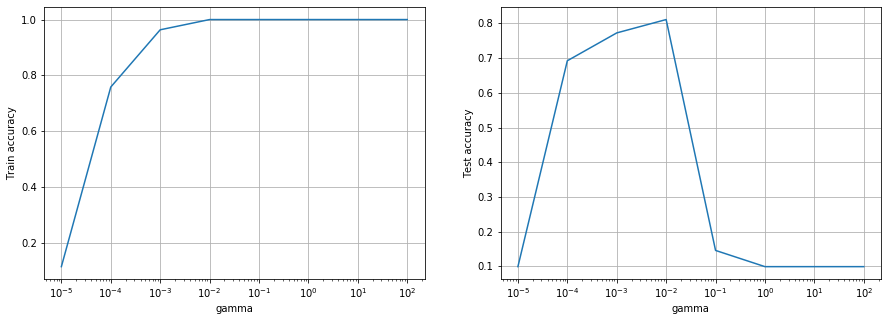

In [14]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for i in gamma_values:
    svm = SVC(C=10,kernel='rbf',gamma=i)
    svm.fit(X_train,y_train)
    train_acc_list.append(svm.score(X_train,y_train))
    test_acc_list.append(svm.score(X_test,y_test))
print('training accuracy with different gammas',train_acc_list)
print('test accuracy with different gammas',test_acc_list)

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

As I said before, gamma parameter controls the distance of influence of a single training point. If gamma is big this distance is very small, so points which are really close can be classified as different. On the other hand, a low gamma makes this distance bigger, so points that are close might be classified as the same group.

Having a big gamma means that your classification boundary is closer to the training points, so in the training set, increasing gamma means having less errors in the training set. Even so, when gamma is 0.01 the accuracy stops getting better.
On the other hand, in the test set, when we increase gamma, the model accuracy improves until  gamma is equal to 0.01  when the accuracy start getting worse because of overfitting. 

The best gamma is 0.01 because using it, we obtained the best training_accuracy and the best test_accuracy.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [198 182 193 199 203 192 221 198 210 204]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [16]:
#get training and test error for the best SVM model from CV


best_SVM = SVC(C=10,kernel='rbf',gamma=0.01)
best_SVM.fit(X_train,y_train)

training_error = 1 - best_SVM.score(X_train,y_train)
test_error = 1 - best_SVM.score(X_test,y_test)



print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.113690


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [17]:
from sklearn import linear_model

logisticregression=linear_model.LogisticRegression(C=1000)
logisticregression.fit(X_train,y_train)

training_error = 1 - logisticregression.score(X_train,y_train)
test_error = 1 - logisticregression.score(X_test,y_test)



print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.299586


## TO DO 9 Try  with regularization (use C=1)¶

In [18]:
# ADD YOUR CODE
logisticregression=linear_model.LogisticRegression(C=1)
logisticregression.fit(X_train,y_train)

training_error = 1 - logisticregression.score(X_train,y_train)
test_error = 1 - logisticregression.score(X_test,y_test)

print ("Best regularized logistic regression training error: %f" % training_error)
print ("Best regularized logistic regression test error: %f" % test_error)

C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrador\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best regularized logistic regression training error: 0.013500
Best regularized logistic regression test error: 0.254931


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

When we use 2000 data points for training isntead of 600, the accuracy of the model increases. This is because the model has more info related to the data that it has to classify.

The performance  of SVM is better than Logistic Regression. In case of the Logistic Regression, when we use regularization, the test error decreases because if it's used, it will prevent overfitting. A bigger C implies to be closer to overfitting.




## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

Y predicted by logistic regression wrong: 6
Y predicted by svm correctly: 1
real y: 1
INPUT:


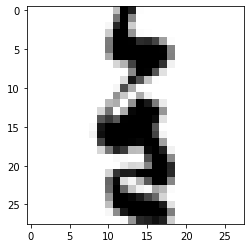

LABEL: 1


In [19]:
LR_prediction = logisticregression.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)


predicted_value=0
index=0

for i in y_test:
    if ((LR_prediction[i]!=y_test[i]) and (SVM_prediction[i]==y_test[i])):
        y_lr_predicted = LR_prediction[i]
        y_svm_precited = SVM_prediction[i]
        real_y = y_test[i]
        index=i
        break




print("Y predicted by logistic regression wrong:", y_lr_predicted)
print("Y predicted by svm correctly:", y_svm_precited)
print("real y:", real_y)

plot_input(X_test,y_test,index)
    
    

# ADD CODE

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [20]:
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)
train, train_counts = np.unique(y_train, return_counts=True)
print("Labels and frequencies in training set: ", train_counts)

confusion_SVM = confusion_matrix(y_test,SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = confusion_matrix(y_test,LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5802 5818 5807 5801 5797 5808 5779 5802 5790 5796]
Labels and frequencies in training set:  [198 182 193 199 203 192 221 198 210 204]

 Confusion matrix SVM  
 
 [[5517    3    5   20   76   40    8   69   36   28]
 [  35 5038   85   71  136    4  190    6  111  142]
 [   1  115 4650  123   81   23  454   29  222  109]
 [  14   76   89 5416   52   38   26   31   36   23]
 [ 193  132  105   51 5007    9  107   38   87   68]
 [  69   68  211  193   69 4970   51   24  137   16]
 [  13  101  169   35  176    3 5162   74   39    7]
 [  59   21   62   74  156   21   51 5249   65   44]
 [  48  136   60   87   16   22  168    6 5228   19]
 [  34  178  138   19  122    5   25   38   68 5169]]

 Confusion matrix SVM (normalized)   
 
 [[0.95 0.   0.   0.   0.01 0.01 0.   0.01 0.01 0.  ]
 [0.01 0.87 0.01 0.01 0.02 0.   0.03 0.   0.02 0.02]
 [0.   0.02 0.8  0.02 0.01 0.   0.08 0.   0.04 0.02]
 [0.   0.01 0.02 0.93 0.01 0.01 0.   0.01 0.01 0.  ]
 [0.03 0.02 0.0

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

The classes that have more accuracy are less similar to the others than the ones that have less accuracy.
For example, data belonging to class 2 (accuracy 0.8) are similar to data of class 6, we can see that observing Hiragana characters of it and analysing that in the confusion matrix when class 2 data is predicted wrongly, the prediction that occurs the most is data of class 6.
Other example will be data belonging to class 5 (accuracy 0.86), when they are predicted errornously, most are predicted as samples of class 2. Again, if we look these Hiragana characters, they are similar too.
